ERROR ANALYSIS

IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import scipy.stats
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr




OPENING THE DATASETS

In [159]:
#ACCRA
Accra_gauge= xr.open_dataset('Accra_gauge.nc').precip.drop_vars(['lon', 'lat'])
Accra_sat_A=xr.open_dataset('Accra_SatA.nc').pre.drop_vars(['lon', 'lat'])
Accra_sat_B=xr.open_dataset('Accra_SatB.nc').precip.drop_vars(['lon', 'lat'])


#KUMASI
Kumasi_gauge= xr.open_dataset('Kumasi_gauge.nc').precip.drop_vars(['lon', 'lat'])#.groupby('time.year').mean('time')
Kumasi_sat_A=xr.open_dataset('Kumasi_SatA.nc').pre.drop_vars(['lon', 'lat'])#.groupby('time.year').mean('time')
Kumasi_sat_B=xr.open_dataset('Kumasi_SatB.nc').precip.drop_vars(['lon', 'lat'])#.groupby('time.year').mean('time')

QUALITY CONTROL ON DATASETS

In [162]:
gauge_values = np.squeeze(Kumasi_gauge.values)
satA_values = np.squeeze(Kumasi_sat_A.values)
satB_values = np.squeeze(Kumasi_sat_B.values)

DEFINING FUNCTIONS TO CALCULATE FOR ERROR METRICS

In [169]:

# Define a function to calculate root mean squared error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def bias(y_true, y_pred):
    return sum(y_true)/sum(y_pred)


#MATHEMATICAL CALCULATIONS FOR ERROR METRICS

error_satA = mean_absolute_error(gauge_values, satA_values)
rmse_satA = root_mean_squared_error(gauge_values, satA_values)
corr_satA, _ = pearsonr(gauge_values.flatten(), satA_values.flatten())
mre_satA = ((  gauge_values.mean()-satA_values.mean()) / gauge_values.mean()) * 100
bias_A = bias(gauge_values, satA_values) 

error_satB = mean_absolute_error(gauge_values, satB_values)
rmse_satB = root_mean_squared_error(gauge_values, satB_values)
corr_satB, _ = pearsonr(gauge_values.flatten(), satB_values.flatten())
mre_satB =(( gauge_values.mean()- satB_values.mean()) / gauge_values.mean()) * 100
bias_B = bias(gauge_values,satB_values,)


# Print error metrics
print("Satellite Dataset A:")
print("Mean Absolute Error:", error_satA)
print("Root Mean Square Error:", rmse_satA)
print("Mean Relative Error (MRE) in Percentage:", mre_satA)
print("Pearson's Correlation Coefficient:", corr_satA)
print("Bias:", bias_A)

print("\nSatellite Dataset B:")
print("Mean Absolute Error:", error_satB)
print("Root Mean Square Error:", rmse_satB)
print("Mean Relative Error (MRE) in Percentage:", mre_satB)
print("Pearson's Correlation Coefficient:", corr_satB)
print("Bias:", bias_B)

Satellite Dataset A:
Mean Absolute Error: 23.229012
Root Mean Square Error: 33.34316
Mean Relative Error (MRE) in Percentage: 5.073615536093712
Pearson's Correlation Coefficient: 0.899865215144352
Bias: 1.0534479152481842

Satellite Dataset B:
Mean Absolute Error: 22.551788
Root Mean Square Error: 31.835327
Mean Relative Error (MRE) in Percentage: 0.139642134308815
Pearson's Correlation Coefficient: 0.9134010105982103
Bias: 1.0013983552161876


VISUALIZATION OF DATASETS

C:\Users\ampon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ampon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ampon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ampon\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

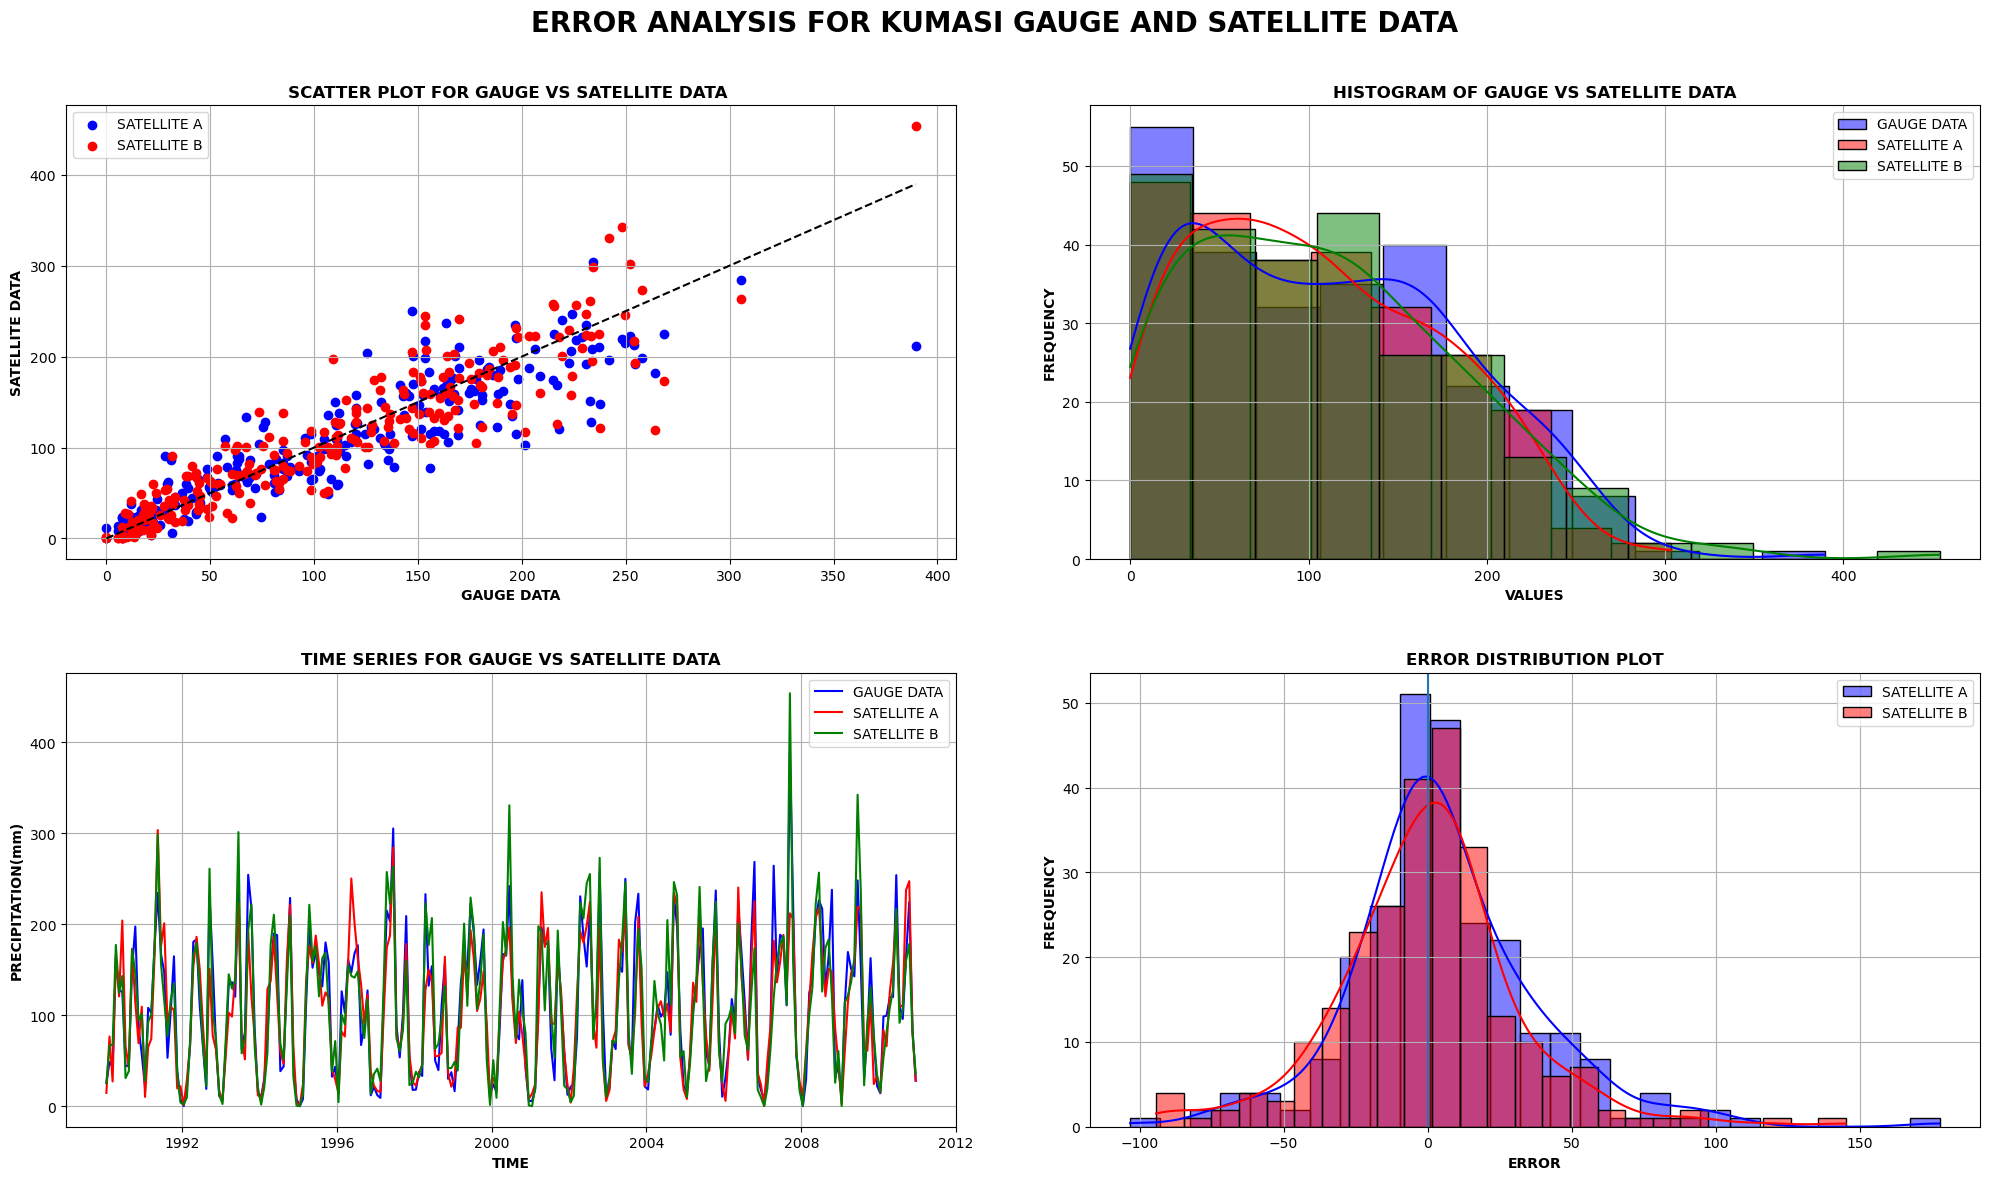

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Scatter plot
axes[0, 0].scatter(gauge_values, satA_values, color='blue', label='SATELLITE A')
axes[0, 0].scatter(gauge_values, satB_values, color='red', label='SATELLITE B')
axes[0, 0].plot([min(gauge_values), max(gauge_values)], [min(gauge_values), max(gauge_values)], color='black', linestyle='--')
axes[0, 0].set_xlabel('GAUGE DATA', fontweight='bold')
axes[0, 0].set_ylabel('SATELLITE DATA', fontweight='bold')
axes[0, 0].set_title('SCATTER PLOT FOR GAUGE VS SATELLITE DATA ', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Histogram
sns.histplot(gauge_values, color='blue', alpha=0.5, label='GAUGE DATA', kde=True, ax=axes[0, 1])
sns.histplot(satA_values, color='red', alpha=0.5, label='SATELLITE A', kde=True, ax=axes[0, 1])
sns.histplot(satB_values, color='green', alpha=0.5, label='SATELLITE B', kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('VALUES', fontweight='bold')
axes[0, 1].set_ylabel('FREQUENCY', fontweight='bold')
axes[0, 1].set_title('HISTOGRAM OF GAUGE VS SATELLITE DATA', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Time series plot
axes[1, 0].plot(time_values, gauge_values, color='blue', label='GAUGE DATA')
axes[1, 0].plot(time_values, satA_values, color='red', label='SATELLITE A')
axes[1, 0].plot(time_values, satB_values, color='green', label='SATELLITE B')
axes[1, 0].set_xlabel('TIME', fontweight='bold')
axes[1, 0].set_ylabel('PRECIPITATION(mm)', fontweight='bold')
axes[1, 0].set_title('TIME SERIES FOR GAUGE VS SATELLITE DATA', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Error distribution plot
error_A = gauge_values - satA_values
error_B = gauge_values - satB_values
sns.histplot(error_A, color='blue', alpha=0.5, label='SATELLITE A', kde=True, ax=axes[1, 1])
sns.histplot(error_B, color='red', alpha=0.5, label='SATELLITE B', kde=True, ax=axes[1, 1])
plt.axvline(0)
axes[1, 1].set_xlabel('ERROR', fontweight='bold')
axes[1, 1].set_ylabel('FREQUENCY', fontweight='bold')
axes[1, 1].set_title('ERROR DISTRIBUTION PLOT', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
fig.subplots_adjust(top=0.90, hspace=0.25, wspace=0.15)
plt.suptitle('ERROR ANALYSIS FOR KUMASI GAUGE AND SATELLITE DATA', fontweight='bold',fontsize= 20)
plt.savefig('ERROR_ANALYSIS_ksi.png', bbox_inches='tight', dpi=900)
plt.show()


OTHER METRICS

In [16]:
def bias(gauge_values,satA_values):
    return sum(gauge_values)/sum(satA_values)
pbias=bias(gauge_values,satA_values)
pbias

0.7443920996713999

In [156]:
Accra_gauge= xr.open_dataset('Accra_gauge.nc').precip.drop_vars(['lon', 'lat']).groupby('time.year').mean('time')
Accra_sat_A=xr.open_dataset('Accra_SatA.nc').pre.drop_vars(['lon', 'lat']).groupby('time.year').mean('time')
Accra_sat_B=xr.open_dataset('Accra_SatB.nc').precip.drop_vars(['lon', 'lat']).groupby('time.year').mean('time')

gauge = np.squeeze(Accra_gauge.values)
satA = np.squeeze(Accra_sat_A.values)
satB = np.squeeze(Accra_sat_B.values)


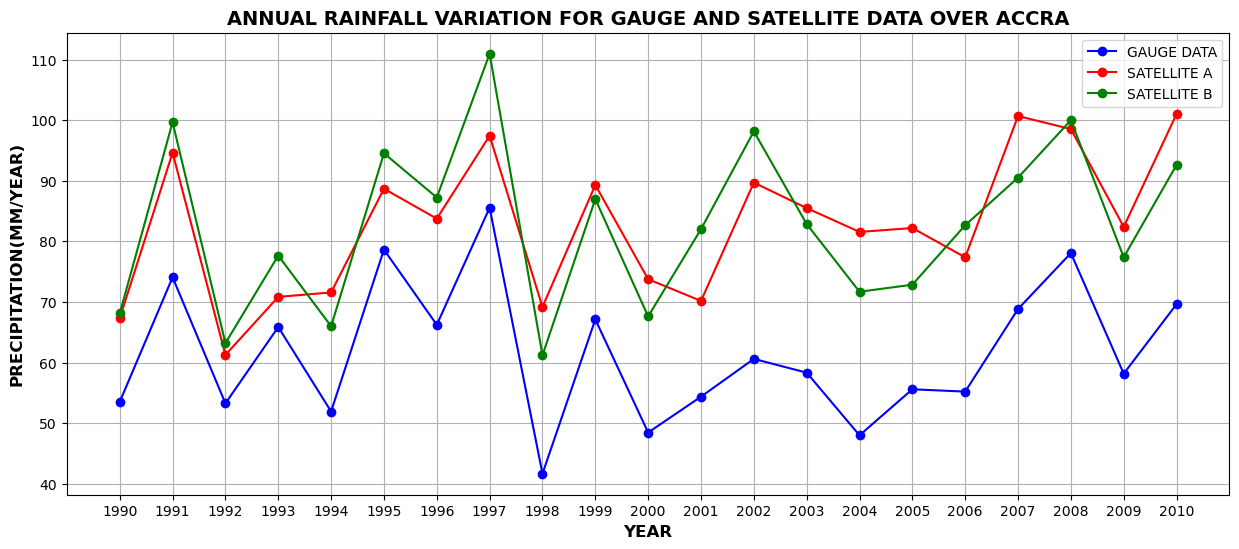

In [158]:
fig, ax = plt.subplots(figsize=(15, 6))
# ax = ax.flatten()

ax.plot(year, gauge, color='blue', label='GAUGE DATA', marker='o')
ax.plot(year, satA, color='red', label='SATELLITE A',marker='o')
ax.plot(year, satB, color='green', label='SATELLITE B',marker='o')
ax.set_xlabel('YEAR', fontsize=12,fontweight='bold')
ax.set_ylabel('PRECIPITATION(MM/YEAR)', fontsize=12, fontweight='bold')
ax.legend()
ax.set_title('ANNUAL RAINFALL VARIATION FOR GAUGE AND SATELLITE DATA OVER ACCRA', fontsize=14, fontweight='bold')

ax.grid(True)
fig.savefig('annual-rainfall-Accra', bbox_inches='tight', dpi=500)





In [142]:
a = gauge - satA
b = gauge - satB
# plt.plot(time_values,a)

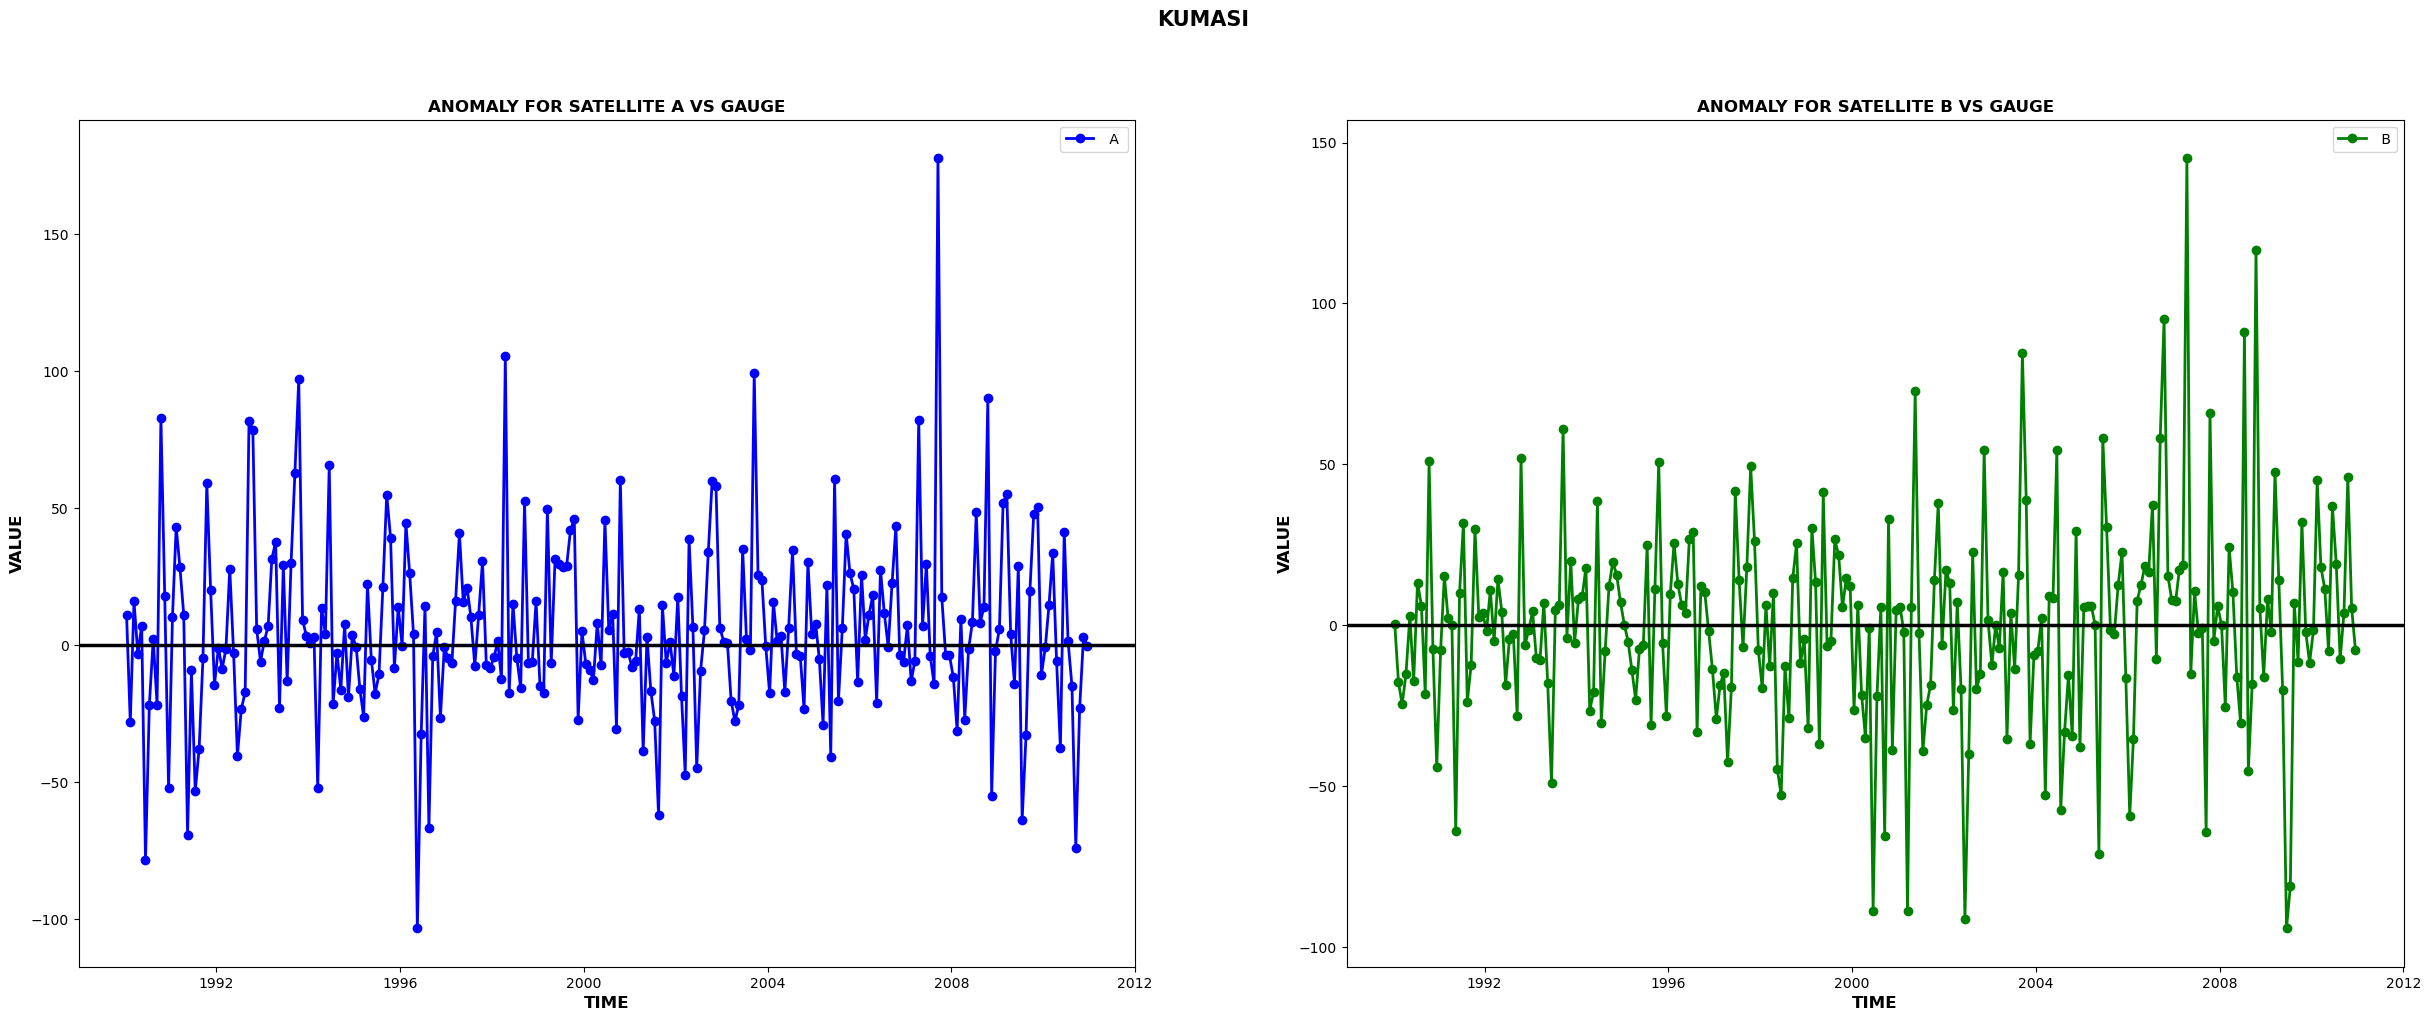

In [143]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30, 11))
ax = ax.flatten()



ax[0].plot(time_values,a, label=' A ', color='blue', marker='o', linewidth=2)
ax[0].set_xlabel('TIME', fontsize=12,fontweight='bold')
ax[0].set_ylabel('VALUE', fontsize=12, fontweight='bold')
ax[0].legend()
#ax[0].grid(True)
ax[0].axhline(0, linewidth= 2.5, color='black')
ax[0].set_title('ANOMALY FOR SATELLITE A VS GAUGE', fontsize=12, fontweight='bold')

ax[1].plot(time_values, b, label=' B', color='green', marker='o', linewidth=2)
ax[1].set_xlabel('TIME', fontsize=12, fontweight='bold')
ax[1].set_ylabel('VALUE', fontsize=12,fontweight='bold')
ax[1].legend()
#ax[1].grid(True)
ax[1].axhline(0,linewidth= 2.5,color='black')
ax[1].set_title('ANOMALY FOR SATELLITE B VS GAUGE', fontsize=12, fontweight='bold')
fig.suptitle('KUMASI', fontweight='bold', fontsize=15)
plt.savefig('KUMASI.png', bbox_inches='tight', dpi=500)
